<a href="https://colab.research.google.com/github/DragonSoul2000/Repositorio_Analisis_estadistico_y_exploratorio/blob/main/Actividad1_An%C3%A1lisis_estad%C3%ADstico_y_exploratorio_VersionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar Librerias necesarias:

In [48]:
#importar librerias necesarias para realizar la estadistica:
# Numpy para realizar las operaciones numéricas vectoriales:
import numpy as np
# ppandas para el manejo de datos tabulares
import pandas as pd
# para que se pueda hacer funciones estadísticas avanzadas
from scipy import stats
# para realizar la visualización de datos:
import matplotlib.pyplot as plt
# para realizar la visualización de datos:
import seaborn as sns


## Conexión hacia los datos:

In [49]:
# CREACIÓN DE RUTA PARA LEER EL ARCHIVO QUE SE ENCUENTRAN LOS DATOS A ANÁLIZAR:
df = pd.read_csv("/content/TechTrend_CPU_Dataset.csv")
# VISUALIZAR DATOS:
print(df.shape) # indica el tamaño del archivo
df.info() # muestra la información del archivo
df.head() # muestra la tabla de las primeras columnas

(25, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vendor                 25 non-null     object 
 1   Model                  25 non-null     object 
 2   Release Date           25 non-null     int64  
 3   Process (nm)           25 non-null     int64  
 4   Transistors (million)  25 non-null     float64
 5   Freq (MHz)             25 non-null     int64  
 6   TDP (W)                25 non-null     float64
 7   Cores                  25 non-null     int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ KB


,Vendor,Model,Release Date,Process (nm),Transistors (million),Freq (MHz),TDP (W),Cores
0,Intel,INT-2021-825,2021,5,34175.56,4382,115.1,24
1,VIA,VIA-2016-924,2016,10,4442.07,3532,23.6,2
2,AMD,AMD-2008-408,2008,45,368.93,3160,42.4,4
3,AMD,AMD-2000-902,2000,180,35.60,2292,24.6,1
4,Intel,INT-2020-517,2020,5,19799.37,3718,72.3,4


## Mostrar todos los datos para comenzar la limpieza:

In [50]:
#Mostrar todos los datos:
df.head(25)

,Vendor,Model,Release Date,Process (nm),Transistors (million),Freq (MHz),TDP (W),Cores
0,Intel,INT-2021-825,2021,5,34175.56,4382,115.1,24
1,VIA,VIA-2016-924,2016,10,4442.07,3532,23.6,2
2,AMD,AMD-2008-408,2008,45,368.93,3160,42.4,4
3,AMD,AMD-2000-902,2000,180,35.60,2292,24.6,1
4,Intel,INT-2020-517,2020,5,19799.37,3718,72.3,4
5,Intel,INT-2019-862,2019,7,14030.14,4159,88.1,1
6,Intel,INT-2012-276,2012,22,1497.54,3906,40.1,16
7,Qualcomm,QUA-2015-981,2015,14,3731.96,3395,22.6,2
8,AMD,AMD-2012-660,2012,22,1234.87,3849,45.3,32
9,AMD,AMD-2013-534,2013,22,2039.17,3616,48.6,4


In [51]:
print(df.shape)
df.info()

(25, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vendor                 25 non-null     object 
 1   Model                  25 non-null     object 
 2   Release Date           25 non-null     int64  
 3   Process (nm)           25 non-null     int64  
 4   Transistors (million)  25 non-null     float64
 5   Freq (MHz)             25 non-null     int64  
 6   TDP (W)                25 non-null     float64
 7   Cores                  25 non-null     int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ KB


Con la función de *df.info* pudimos ver las variables categóricas y las numéricas, por lo que al ver todas las columnas se ven los datos completos y son del mismo valor, por lo que no hay ningún dato faltante.

En caso de que hubiera distintos valores como  la columna ‘vendedor’  tiene 25 registros en el ‘Non -null count’, pero en la columna ‘ Model’ tiene 26 registros en el ‘Non -null count’ si habría datos faltantes y se tendría que hacer una limpieza.  

También dependerá la cantidad de datos faltantes  que hay, por lo que si hay muchos datos faltantes se tendría que interpolarlo con datos vecinos o también usar modelos de machine learning(ML) para eliminarlos.

Pero en este caso se maneja con datos pequeños, ya que al hacer el código ‘print(df.shape)’ y ‘df.info()’ mostraron que los datos son 24 datos en total


Se vio que tambíen  al no tener datos vacíos ni están en blanco,  no se encuentran con datos faltantes, no se tiene registros(filas) repetidas, no se tiene valores extremos y no se tienen errores tipográficos.


## Limpieza:

## Para la Limpieza se utiliza para las siguientes situaciones comunes.


1.   Datos faltantes de algunas celdas
2.   Columnas irrelevantes
3.  Registros (filas) repetidos
4.  valores Extremos (outliers) en el caso de las variables númericas. Se deben analizar en detalle por que no es necesariamente eliminarlos.
5.  Errores tipográficos en caso de las variables categóricas.


Al final de este proceso  se debe de tener un set de datos integros listo para la fase de analís.

La limpieza se baso el video del canal Codificando Bits:



https://youtu.be/bGnD1Ki7j-g?si=qpfjUAT2RFAIvW8N




In [52]:
df.head(25)

,Vendor,Model,Release Date,Process (nm),Transistors (million),Freq (MHz),TDP (W),Cores
0,Intel,INT-2021-825,2021,5,34175.56,4382,115.1,24
1,VIA,VIA-2016-924,2016,10,4442.07,3532,23.6,2
2,AMD,AMD-2008-408,2008,45,368.93,3160,42.4,4
3,AMD,AMD-2000-902,2000,180,35.60,2292,24.6,1
4,Intel,INT-2020-517,2020,5,19799.37,3718,72.3,4
5,Intel,INT-2019-862,2019,7,14030.14,4159,88.1,1
6,Intel,INT-2012-276,2012,22,1497.54,3906,40.1,16
7,Qualcomm,QUA-2015-981,2015,14,3731.96,3395,22.6,2
8,AMD,AMD-2012-660,2012,22,1234.87,3849,45.3,32
9,AMD,AMD-2013-534,2013,22,2039.17,3616,48.6,4


Aquí se vio que al no tener datos vacíos ni están en blanco no se encuentran con datos faltantes, no se tiene registros(filas) repetidas, no se tiene valores extremos y no se tienen errores tipográficos.

Se  tiene que ver si hay  columnas irrelevantes, las cuales estas pueden ser:


1.   No contienen información relevante para el problema que queremos resolver.
2.   Una columna categórica, pero es de un solo nivel. Un ejemplo es que una columna únicamente se tuviera el nivel de ‘unkown’
3.  Una columna numérica, pero de un solo valor.  Un ejemplo es que en  una columna todos sus valores son iguales, como 50.
4.  Columnas con información redundante. Un ejemplo seria que si aparte de las columnas month y day, se tuviera la columna month-daty, resultado de combinar las dos anteriores.

No se tiene columnas con información redundante, falta ver
más adelante en el análisis si hay columnas que no se requieran  información.

Pero si se tiene que verificar si hay columna categórica y numérica de un solo nivel o valor.


Para ello primero se debe de hacer lo siguiente:

In [53]:
#Conteo de los niveles en las diferentes columnas categóricas:
cols_cat = ['Vendor', 'Model', 'Release Date', 'Process (nm)', 'Transistors (million)', 'Freq (MHz)', 'TDP (W)', 'Cores']
for col in cols_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')
  #print(df[col].value_counts())

Columna Vendor: 5 subniveles
Columna Model: 25 subniveles
Columna Release Date: 20 subniveles
Columna Process (nm): 11 subniveles
Columna Transistors (million): 25 subniveles
Columna Freq (MHz): 25 subniveles
Columna TDP (W): 24 subniveles
Columna Cores: 8 subniveles


In [54]:
# verificar las columnas numericas:
df.describe()

,Release Date,Process (nm),Transistors (million),Freq (MHz),TDP (W),Cores
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2013.240000,41.400000,12700.084800,3523.000000,55.748000,7.720000
std,7.428997,54.019287,20164.956627,657.093284,29.442997,8.193087
min,2000.000000,3.000000,35.600000,2146.000000,17.000000,1.000000
25%,2008.000000,7.000000,368.930000,3082.000000,34.300000,2.000000
50%,2014.000000,14.000000,3731.960000,3616.000000,48.600000,4.000000
75%,2019.000000,45.000000,14030.140000,4068.000000,72.300000,12.000000
max,2024.000000,180.000000,70000.000000,4390.000000,117.600000,32.000000


In [55]:
# Ver si hay filas repetidas:
#print(f'Tamaño del set antes de eliminar las filas repetidas:')
df2=df.copy() # Para hacer una copia de los datos originales por si acaso.
print(f'Tamaño del set antes de eliminar las filas repetidas: {df2.shape}')
df2.drop_duplicates(inplace=True) # el .drop_duplicates eliminara las filas repetidas, (inplace=True) sobrescribira el df2
print(f'Tamaño del set despues de eliminar las filas repetidas: {df2.shape}')


Tamaño del set antes de eliminar las filas repetidas: (25, 8)
Tamaño del set despues de eliminar las filas repetidas: (25, 8)


# INCISO 1: ANÁLISIS ESTADÍSTICO DESCRIPTIVO:


## INCISO 1) ANÁLISIS ESTADÍSTICO DESCRIPTIVO:

In [56]:
## Análisis estadístico descriptivo para  Freq (MHz):
### Copiar el valor del df2 para evitar que sufran modificaciones.
df3=df2.copy()
print(df3.shape)
df3.info()
df3.head()

(25, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vendor                 25 non-null     object 
 1   Model                  25 non-null     object 
 2   Release Date           25 non-null     int64  
 3   Process (nm)           25 non-null     int64  
 4   Transistors (million)  25 non-null     float64
 5   Freq (MHz)             25 non-null     int64  
 6   TDP (W)                25 non-null     float64
 7   Cores                  25 non-null     int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ KB


,Vendor,Model,Release Date,Process (nm),Transistors (million),Freq (MHz),TDP (W),Cores
0,Intel,INT-2021-825,2021,5,34175.56,4382,115.1,24
1,VIA,VIA-2016-924,2016,10,4442.07,3532,23.6,2
2,AMD,AMD-2008-408,2008,45,368.93,3160,42.4,4
3,AMD,AMD-2000-902,2000,180,35.60,2292,24.6,1
4,Intel,INT-2020-517,2020,5,19799.37,3718,72.3,4


In [57]:
# INCISO 1: ANÁLISIS ESTADÍSTICO DESCRIPTIVO:
## Análisis estadístico descriptivo para  Freq (MHz):
### Copiar el valor del df2 para evitar que sufran modificaciones.
df3=df2.copy()
print(df3.shape)
df3.info()
df3.head()

(25, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Vendor                 25 non-null     object 
 1   Model                  25 non-null     object 
 2   Release Date           25 non-null     int64  
 3   Process (nm)           25 non-null     int64  
 4   Transistors (million)  25 non-null     float64
 5   Freq (MHz)             25 non-null     int64  
 6   TDP (W)                25 non-null     float64
 7   Cores                  25 non-null     int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ KB


,Vendor,Model,Release Date,Process (nm),Transistors (million),Freq (MHz),TDP (W),Cores
0,Intel,INT-2021-825,2021,5,34175.56,4382,115.1,24
1,VIA,VIA-2016-924,2016,10,4442.07,3532,23.6,2
2,AMD,AMD-2008-408,2008,45,368.93,3160,42.4,4
3,AMD,AMD-2000-902,2000,180,35.60,2292,24.6,1
4,Intel,INT-2020-517,2020,5,19799.37,3718,72.3,4


### 1.Análisis estadístico descriptivo para  TDP (W):

In [58]:
Promedio2= df3 ['TDP (W)'].mean()
print(f"El promedio de TDP (W) es: {Promedio2}")
### mediana
mediana2= df3 ['TDP (W)'].median()
print(f"La mediana de TDP (W) es: {mediana2}")
#### desviación estándar
desviacion_estandar2= df3 ['TDP (W)'].std()
print(f"La Desviación Estandar de TDP (W) es: {desviacion_estandar2}")
### mínimo
minimos2= df3 ['TDP (W)'].min()
print(f"El mínimo de TDP (W) es: {minimos2}")

### máximo
maximos2= df3 ['TDP (W)'].max()
print(f"El máximo de TDP (W) es: {maximos2}")

### rango
rango2= df3 ['TDP (W)'].max()-df3 ['TDP (W)'].min()
print(f"El rango de TDP (W) es: {rango2}")


El promedio de TDP (W) es: 55.74799999999999
La mediana de TDP (W) es: 48.6
La Desviación Estandar de TDP (W) es: 29.442997469687082
El mínimo de TDP (W) es: 17.0
El máximo de TDP (W) es: 117.6
El rango de TDP (W) es: 100.6


1. Aquí podemos ver que la media (55.75) > mediana (48.6), por lo que indica que hay valores extremos (atípicos) que pueden estar sesgando la percepción general general. Por lo que puede que haya datos con sesgo a la derecha.

2. Desviación Estándar: indica que en nla frecuencia se desvia del promedio en un  29.44, siendo bajo

3. El valor máximo: nos dice que rl valor más alto que alcanza es de 117.6 de watts

4.  El valor minimo:  nos dice que su valor más pequeño que alcanza es de 17 watts

5. Rango: indica que la diferencia entre el valor máximo y el valor minimo es de 100.6 watts, por lo que tienen una extensión de alrededor de 100.6 watts.



In [59]:
# INCISO 2-Visualización de los datos:

## INCISO 2) Visualización de los datos:

### Histograma para  la frecuencia de los procesadores:

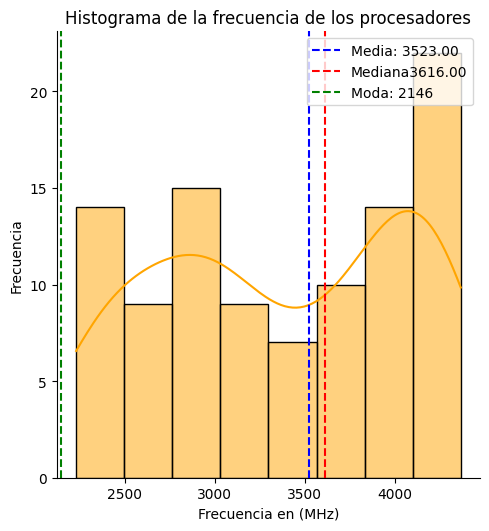

In [95]:
 # histograma de la frecuencia de los procesadores
np.random.seed(0)

#Guardar los datoos de la frecuencia (MHz) en una cadena
frecuenciaProcesadores=  np.array(df3['Freq (MHz)']) # Guarde los datos de la frecuencia de los procesadores en un array
# Media, Mediana y Moda:
media=np.mean(frecuenciaProcesadores)
mediana=np.median(frecuenciaProcesadores)
moda=stats.mode(frecuenciaProcesadores)

#Crear numeros aleatorios dentro de los valores almacenados en la cadena para generar el histograma
frecuenciaAleatoria=  np.random.randint(frecuenciaProcesadores.min(),frecuenciaProcesadores.max(),size=100)  # organize los valores aleatorios para que sea entre el valor minimo de la frecuencia y el valor máximo de la frecuencia.

#Crear histograma
sns.displot(frecuenciaAleatoria, kde=True,color='orange') # Utilice la función recomedada por el maestro para crear el histograma.


# Señalar la media,mediana y moda enel gráfico:
plt.axvline(media, color='blue', linestyle='--',label=f'Media: {media:.2f}')
plt.axvline(mediana, color='red', linestyle='--',label=f'Mediana{mediana:.2f}')
plt.axvline(moda[0], color='green', linestyle='--',label=f'Moda: {moda[0]}')

#Personalización de la grafica:
plt.legend(loc='upper right')
plt.title('Histograma de la frecuencia de los procesadores')
plt.xlabel('Frecuencia en (MHz)')
plt.ylabel('Frecuencia')
plt.show()
#



plt.show()

Se puede ver que en los picos de disperción son los que tienen una frecuencia alta apartir del 4000.
Es un histograma Asimetrico, ya que no tiene simetria y el valor más alto se encuentra a la derecha, por lo que los valores de la frecuencia se alejan más del pico, resultando que hay menos valores (cercanos) por debajo del pico, y más lejanos con fecuencia decreciente por encima del pico.

Esto indica en una desigualdad de las frecuencias de los procesadores

Por lo que no es una distribución normal entre la frecuencia de los procesadores.  

### boxplot

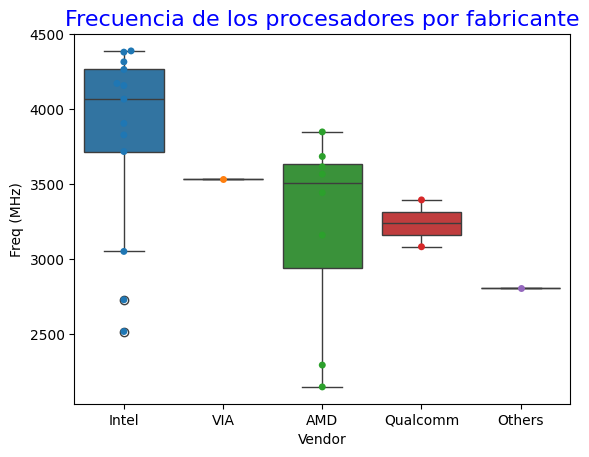

In [62]:
#boxplot comparativo de la frecuencia entre fabricantes.
#plt.title('Título Principal del Boxplot', fontsize=16, color='blue') # Personaliza tamaño y color
plt.title('Frecuencia de los procesadores por fabricante', fontsize=16, color='blue') # Personaliza tamaño y color
sns.boxplot(x='Vendor', y='Freq (MHz)', data=df3, hue='Vendor')
sns.swarmplot(
    x='Vendor',
    y='Freq (MHz)',
    data=df3,
    hue='Vendor'
)
plt.show()

Aqui vemos que:


1.   Intel


*   Su mediana es de alrededor de 4000 en frecuencia.
*   Su frecuencia se encuentra entre un rango de entre 4300 como máximo y 3700 como minimo.
* tiene un rango del 25% inferior  del valor del arededor de 3000
* tiene un rango del 25% maximo  del valor del arededor de 4400



2.   AMD

*   Su mediana es de 3500 en frecuencia.
*   Su frecuencia se encuentra entre un rango de entre 3600 como máximo y 300 como minimo.
* tiene un rango del 25% inferior  del valor menor a 2500
* tiene un rango del 25% maximo  del valor del arededor de 3700

3.  VIA

*   Su mediana es de alrededor de 3510 en frecuencia.
*   Su frecuencia se encuentra entre un rango de entre 3510 como máximo y 3505 como minimo.
* tiene un rango del 25% inferior  del valor del arededor de 3510
* tiene un rango del 25% maximo  del valor del arededor de 3505

4. Qualcomn

*   Su mediana es de alrededor de 3300 en frecuencia.
*   Su frecuencia se encuentra entre un rango de entre 4030 como máximo y 3570 como minimo.
* tiene un rango del 25% inferior  del valor del arededor de 3100
* tiene un rango del 25% maximo  del valor del arededor de 3400

5. Others (otros)

*   Su mediana es de alrededor de 2800 en frecuencia.
*   Su frecuencia se encuentra entre un rango de entre 2800 como máximo y 2800 como minimo.
* tiene un rango del 25% inferior  del valor del arededor de 2800
* tiene un rango del 25% maximo  del valor del arededor de 2800


Por lo que se concluye de que Intel cuenta con una mediana superior a las demás, seguido por via, ADM, Qualcomn y el más bajo son los demás.
Que el intervalo se superponen
Intel, AMD y Qualcomn tienen valores atipicos




<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

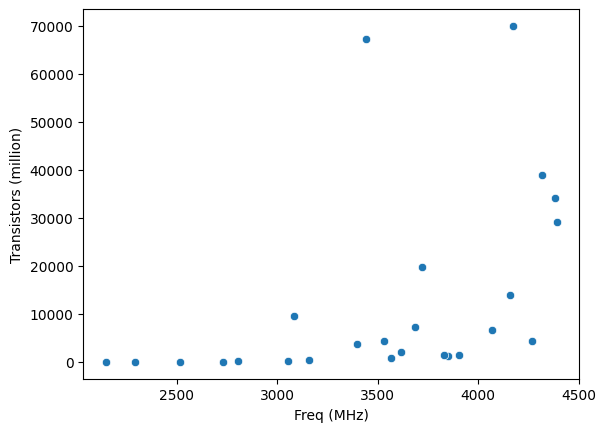

In [63]:
# scatterplot
sns.scatterplot(x='Freq (MHz)', y='Transistors (million)', data=df3)
plt

Como se vio feo se tuvo que investigar cómo se pede ver mejor para lograr indentificar a los valores, el cual seria con el parámetro de 'hue', el cual es un parametro de seaborn para que la segunda variable categórica fuera introducida, con ello podremos poner a que venddor pertenecen los transitores y fecuencias:

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

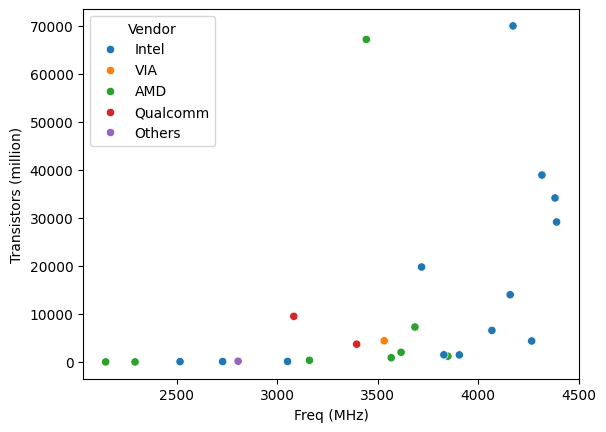

In [64]:
#  Scatterplot para relacionar transitores (million) y  Freq (MHz), diferenciando por Vendor.
sns.scatterplot(x='Freq (MHz)', y='Transistors (million)', hue='Vendor', data=df3)
plt

### Gráfico de líneas

Se ve que no hay una correlación entre los procesadores respecto a sus frecuencias

Para mostrar el connsumo de TDP a lo largo de los años primero se intento con lineas porque pensaba que era más visual.

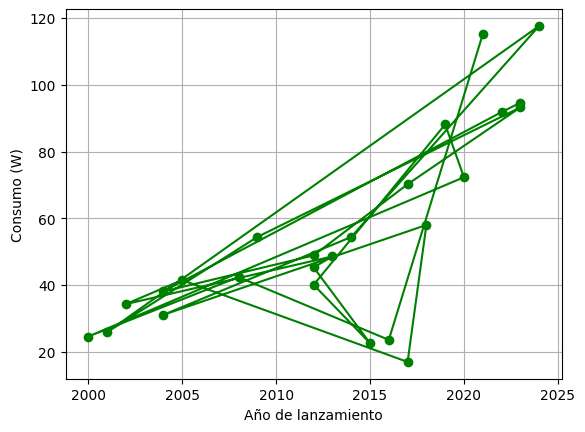

In [65]:
# Gráfico de líneas para mostrar el consumo a lo largo de los años
plt.plot(df3['Release Date'], df3['TDP (W)'], marker='o',linestyle='-',color='green')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Consumo (W)')
plt.grid(True)
plt.show()


Ante el resultado, decidi cambiarlo al de barras para que sea más entendible, comprensible y agradable a la vista.

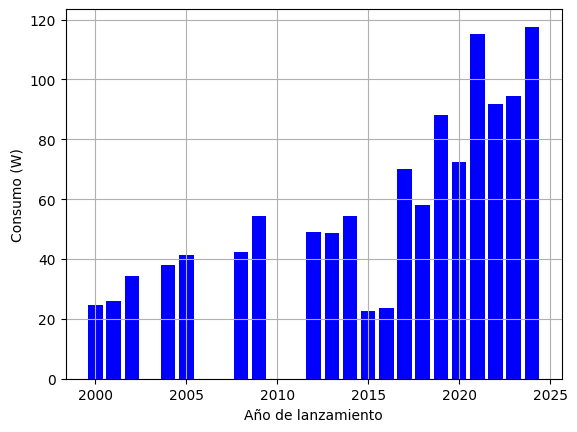

In [66]:
# Grafico de barras para comparar el consumo TDP (W) a lo largo de los años
plt.bar(df3['Release Date'], df3['TDP (W)'],color='blue')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Consumo (W)')
plt.grid(True)
plt.show()

Se puede ver que conforme fue avanzando los años, se fue incrementando el consumo TDD (W) en los procesadores

In [67]:
#evolución de la frecuencia promedio por fabricante
def devolver_Vendedor(Vendor):
  return df3[(df3['Vendor']==Vendor)]
IntelBarra= devolver_Vendedor('Intel')
IntelBarra.head()

,Vendor,Model,Release Date,Process (nm),Transistors (million),Freq (MHz),TDP (W),Cores
0,Intel,INT-2021-825,2021,5,34175.56,4382,115.1,24
4,Intel,INT-2020-517,2020,5,19799.37,3718,72.3,4
5,Intel,INT-2019-862,2019,7,14030.14,4159,88.1,1
6,Intel,INT-2012-276,2012,22,1497.54,3906,40.1,16
10,Intel,INT-2002-385,2002,130,93.54,2516,34.3,1


## Inciso 3

# Formulación de Hipotesis

1. H₀: No hay diferencia entre las medias.
2. H₁: Hay diferencia significativa.

Quise hacer primero la prueba T, por lo que me base en los videos de estos canales:
1.  del canal de Palacios Portugal: https://youtu.be/6A3j0q-pg8g?si=UwzElk85KuKyuyqV
2. del canal de Naren Castellon:
https://youtu.be/RoMLbS26pwY?si=Qh4Oiz6LrWPxAJ8h

Primero intente hacer en base del video de Palacios Portugal.


Se debe de aclarar de que la prueba de T student se usara porque la cantidad de datos es menor que 30.

Pero antes tenia que quitar las demás columnas para que solamente quedara el vendedor y las frecuencias, por lo que hice el siguiente procedimiento:

In [68]:
# Formulación de Hipotesis

#1. H₀: No hay diferencia entre las medias.
#2. H₁: Hay diferencia significativa.

# Saber si hay diferencia significativa en la frecuencia entre procesadores AMD e intel
df4=df2.copy() # copiar el df2 ya que es el dataset original limpiado
df4.head() # comprobar el dataset

,Vendor,Model,Release Date,Process (nm),Transistors (million),Freq (MHz),TDP (W),Cores
0,Intel,INT-2021-825,2021,5,34175.56,4382,115.1,24
1,VIA,VIA-2016-924,2016,10,4442.07,3532,23.6,2
2,AMD,AMD-2008-408,2008,45,368.93,3160,42.4,4
3,AMD,AMD-2000-902,2000,180,35.60,2292,24.6,1
4,Intel,INT-2020-517,2020,5,19799.37,3718,72.3,4


### Sacar las columnas que no se necesitaran para que unicamente se conserven las que si se requieren, las de vendedor y las frecuencias:

In [69]:
analisis_frecuencia=df4.drop(columns=['Model','Release Date','Process (nm)','Transistors (million)','TDP (W)','Cores'])
analisis_frecuencia.head()

,Vendor,Freq (MHz)
0,Intel,4382
1,VIA,3532
2,AMD,3160
3,AMD,2292
4,Intel,3718


### Generar método para que unicamente guarde el vendedor seleccionado:

In [70]:
# 1° intento:
#def devolver_intel(Vendor,Freq):
 # return analisis_frecuencia[(analisis_frecuencia['Vendor']==Vendor&(analisis_frecuencia['Freq (MHz)'==Freq]))]
 #2° intento:
def devolver_Procesador(Vendor):
  return analisis_frecuencia[(analisis_frecuencia['Vendor']==Vendor)]
Intel= devolver_Procesador('Intel')
Intel.head()


,Vendor,Freq (MHz)
0,Intel,4382
4,Intel,3718
5,Intel,4159
6,Intel,3906
10,Intel,2516


In [71]:
AMD= devolver_Procesador('AMD')
AMD.head()

,Vendor,Freq (MHz)
2,AMD,3160
3,AMD,2292
8,AMD,3849
9,AMD,3616
17,AMD,2146


Ya con esto pude basarme en el video, por lo que realice lo siguiente:

### sacar la media y desviación estandar de Intel y AMD

In [72]:
#media:
meanIntel,meanAMD= Intel['Freq (MHz)'].mean(),AMD['Freq (MHz)'].mean()
print(f"la media de Intel es : {meanIntel}")
print(f"la media de AMD es : {meanAMD}")
#desviación estandar:
stdIntel,stdAMD= Intel['Freq (MHz)'].std(),AMD['Freq (MHz)'].std()
print(f"la desviación estandar  de Intel es : {stdIntel}")
print(f"la desviación estandar  de AMD es : {stdAMD}")

la media de Intel es : 3807.923076923077
la media de AMD es : 3219.75
la desviación estandar  de Intel es : 638.2220697033363
la desviación estandar  de AMD es : 649.9537895661726


In [73]:
# crear un nuevo dataset para combinar intel y AMD
Nuevo_Dataset=pd.concat([Intel,AMD])
Nuevo_Dataset.head(100)

,Vendor,Freq (MHz)
0,Intel,4382
4,Intel,3718
5,Intel,4159
6,Intel,3906
10,Intel,2516
13,Intel,4068
14,Intel,2728
15,Intel,4266
16,Intel,4173
19,Intel,4390


## Grafica para mostrar la prueba t:

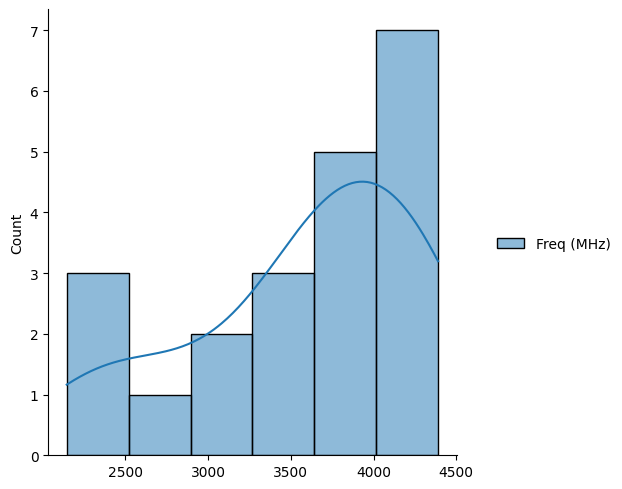

In [74]:
sns.displot(Nuevo_Dataset, kde=True,color='orange')
plt.show()

Decidi basarme en el video de Prueba de Hipótesis Inferencia estadística 😀 T-Student, Homogeneidad de varianza, todo en Python. del canal IngenerIA con python: https://youtu.be/dfpd2RyYQ6U?si=EynYA-dPVrwsK2Hu

Para ver cómo hacer la prueba de T student por dos muestras:


Establecemos primero el nivel de significancia , el cuál va a cer el de 95%, por lo que el valor su valor sera α=0.05

In [75]:
# importar las librerias necesarias
from scipy.stats import ttest_1samp,ttest_ind # ttest_in=permite hacer la comparación entre medias de dos grupos,
import warnings
warnings.filterwarnings('ignore')


In [76]:
grup1=Intel['Freq (MHz)']
grup2=AMD['Freq (MHz)']

In [77]:
from dask.array.reductions import mean
grup1.var(),grup1.std(),grup1.mean()

(407327.41025641025, 638.2220697033363, np.float64(3807.923076923077))

In [78]:
# medir el tamaño entre Intel y AMD
grup1.shape,grup2.shape

((13,), (8,))

Realizar una prueba de homogeneidad de varianza: Levene
H0: las var

In [79]:
ttest_ind(grup1,grup2)

TtestResult(statistic=np.float64(2.037005759064986), pvalue=np.float64(0.05582565566814218), df=np.float64(19.0))

In [80]:
pvalue=np.float64(0.05582565566814218)
if pvalue < 0.05:
    print("es menor que α=0.05 ")
else:
    print("es mayor que α=0.05")



  #  H₀: No hay diferencia entre las medias.
   # H₁: Hay diferencia significativa.


es mayor que α=0.05


Vemos que el valor de p mayor que α, por lo que indica que las medias de las frecuencias de Intel y AMD tienen una diferencia significativa.

## Anova
se va a comparar ahora las frecuencias  de 3 marcas de procesadores.

Se utilizara el One-Way ANOVA ya que unicamente vamos a medir un factor, el cuál es la frecuencia.

La hipótesis seria la siguiente:


*   H0: las medias de todos los fafricantes son iguales (μ1=μ2=μ3​)
*   H1: Al menos una medida es distinta.




In [81]:
from scipy import stats
# aqui ahora agregariamos al fabricante VIA para tener todos sus datos:
VIA = devolver_Procesador('VIA')
VIA.head() #Mostrar todos las frecuencias del procesador VIA
#Cálculo de la anova oneway y del p-valor
f_start,p_valor=stats.f_oneway(Intel['Freq (MHz)'],AMD['Freq (MHz)'],VIA['Freq (MHz)'])
print("F:",round(f_start,4)," | p- valor;",round(p_valor,4))

F: 2.0778  | p- valor; 0.1527


In [82]:
from scipy import stats
# aqui ahora agregariamos al fabricante VIA para tener todos sus datos:
VIA = devolver_Procesador('VIA')
VIA.head() #Mostrar todos las frecuencias del procesador VIA
#Cálculo de la anova oneway y del p-valor
f_start,p_valor=stats.f_oneway(Intel['Freq (MHz)'],AMD['Freq (MHz)'],VIA['Freq (MHz)'])
print("F:",round(f_start,5)," | p- valor;",round(p_valor,5))

F: 2.0778  | p- valor; 0.15273


Se debe de tomar en cuenta que:


*   Valor F: mide cuánto varían las medias entre los grupos, en relación con la variación interna de cada grupo.
*   p-valor: indica si la diferencia observada entre las medias es estadísticamenmte significativa.
*  Si el p-valor es < 0,05, se rechazara la hipótesis nula y se concluye que por los menos un grupo defiere de manera significativa de los demás.



Al obtener el valor de F, se puede ver que se tiene una variación de 2.078 entre los grupos de las medias con la variuación interna de cada grupo.

El valor-p (0.15273) es menor a 0.5, por lo que se rechaza la hipotesis de que las medias de todos los fabricantes son iguales, por lo que hay diferencias reales entre las frecuencia de los fabricantes.

Por lo que la frecuencia de unos fafricantes son mucho más altas que otros, lo que incluye que en la calidad y potencia de los procesadores de los fabricantes.

# Otra Versión del Histograma en base a lo que viene en canvas

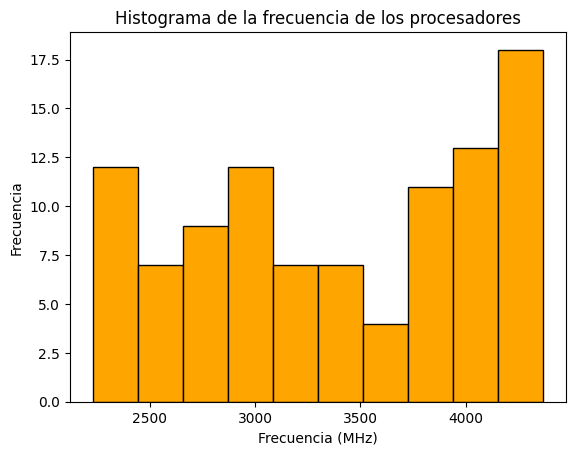

In [83]:
np.random.seed(0)
arrayFrecuenciaProcesadores=  np.array(df3['Freq (MHz)'])
NumeroAleatorioProcesadoresFrecuencia=  np.random.randint(arrayFrecuenciaProcesadores.min(),arrayFrecuenciaProcesadores.max(),size=100)
plt.hist(NumeroAleatorioProcesadoresFrecuencia, bins=10, color='orange',edgecolor='black')
plt.title('Histograma de la frecuencia de los procesadores')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Frecuencia')
plt.show()

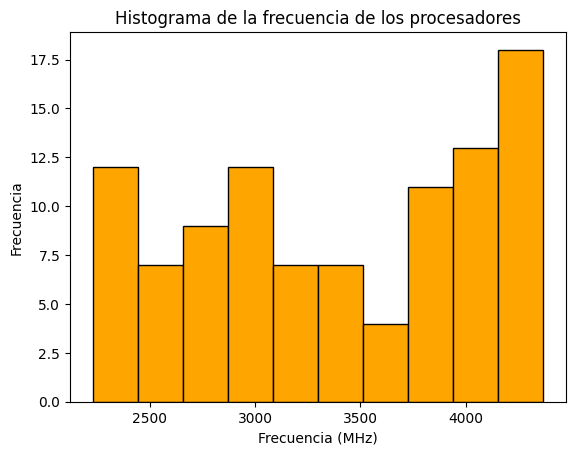

In [61]:
np.random.seed(0)
arrayFrecuenciaProcesadores=  np.array(df3['Freq (MHz)'])
NumeroAleatorioProcesadoresFrecuencia=  np.random.randint(arrayFrecuenciaProcesadores.min(),arrayFrecuenciaProcesadores.max(),size=100)
plt.hist(NumeroAleatorioProcesadoresFrecuencia, bins=10, color='orange',edgecolor='black')
plt.title('Histograma de la frecuencia de los procesadores')
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Frecuencia')
plt.show()